# Random Forest

### Imports

In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from joblib import dump, load

In [2]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.experimental import enable_halving_search_cv
from sklearn.model_selection import HalvingGridSearchCV
from sklearn import tree

In [3]:
from preprocessing import reemplazarNulls,reemplazarCategoricas,reemplazarFechas,regularizar,targetBooleano,reemplazarCategoricas_OHE,reemplazarNullsNum,keepFeat_OHE

[###] Initial Preprocessings Done                           
[###] Aditional Preprocessings Done                                                   


In [4]:
from utilities import score, score2, df_feat, df_targ, train_val

### Codigo a correr

In [5]:
MAX_JOBS = -1

**Run :** Entrenar Nuevamente o Cargar Entrenado

In [6]:
runSimple = True
runValidated = False
runReg = False
runOhe = True

**Save :** Guardar Modelo (pisa anterior)

In [7]:
saveSimple = True
saveValidated = True
saveReg = True
saveOhe = True
saveBest = True

In [8]:
predictions = pd.DataFrame()

### Preprocesamiento

In [9]:
targetBooleano(df_targ, inplace=True)
ohe_feat = reemplazarCategoricas_OHE(df_feat)

reemplazarNulls(df_feat , inplace=True)
reemplazarCategoricas(df_feat , inplace=True)
reemplazarFechas(df_feat , inplace=True)
df_feat_r = regularizar(df_feat)

reemplazarNullsNum(ohe_feat, inplace=True)
reemplazarFechas(ohe_feat , inplace=True)
# keepFeat_OHE(ohe_feat, 10, inplace=True)

,horas_de_sol,humedad_tarde,humedad_temprano,mm_evaporados_agua,mm_lluvia_dia,nubosidad_tarde,nubosidad_temprano,presion_atmosferica_tarde,presion_atmosferica_temprano,rafaga_viento_max_velocidad,...,missing_rafaga_viento_max_velocidad,missing_temp_max,missing_temp_min,missing_temperatura_tarde,missing_temperatura_temprano,missing_velocidad_viendo_tarde,missing_velocidad_viendo_temprano,y,m,d
id,,,,,,,,,,,,,,,,,,,,,
74816,7.629393,78.0,74.0,5.470542,68.0,4.50597,4.430203,1024.200000,1026.200000,48.0,...,False,False,False,False,False,False,False,2014,6,7
64318,7.629393,14.0,56.0,5.470542,5.8,1.00000,4.430203,998.300000,1002.500000,61.0,...,False,False,False,False,False,False,False,2014,12,7
54357,2.600000,79.0,47.0,5.470542,0.0,8.00000,7.000000,1000.500000,1005.800000,57.0,...,False,False,False,False,False,False,False,2010,7,8
1762,0.000000,92.0,96.0,3.000000,5.0,8.00000,8.000000,1015.400000,1016.800000,54.0,...,False,False,False,False,False,False,False,2015,11,4
89422,7.629393,14.0,37.0,5.470542,0.0,2.00000,4.430203,1006.400000,1011.100000,50.0,...,False,False,False,False,False,False,False,2014,12,22
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49272,6.500000,63.0,44.0,3.800000,0.4,6.00000,2.000000,1011.800000,1014.500000,72.0,...,False,False,False,False,False,False,False,2012,5,23
13885,2.100000,65.0,80.0,1.600000,5.2,7.00000,7.000000,1017.500000,1016.300000,48.0,...,False,False,False,False,False,False,False,2011,10,25
4586,7.629393,81.0,62.0,5.470542,0.0,4.50597,4.430203,1015.257118,1017.655555,35.0,...,False,False,False,False,False,False,False,2015,12,16


In [10]:
df_feat.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 102356 entries, 74816 to 32535
Data columns (total 23 columns):
 #   Column                        Non-Null Count   Dtype  
---  ------                        --------------   -----  
 0   direccion_viento_tarde        102356 non-null  float64
 1   direccion_viento_temprano     102356 non-null  float64
 2   horas_de_sol                  102356 non-null  float64
 3   humedad_tarde                 102356 non-null  float64
 4   humedad_temprano              102356 non-null  float64
 5   llovieron_hamburguesas_hoy    102356 non-null  bool   
 6   mm_evaporados_agua            102356 non-null  float64
 7   mm_lluvia_dia                 102356 non-null  float64
 8   nubosidad_tarde               102356 non-null  float64
 9   nubosidad_temprano            102356 non-null  float64
 10  presion_atmosferica_tarde     102356 non-null  float64
 11  presion_atmosferica_temprano  102356 non-null  float64
 12  rafaga_viento_max_direccion   102356 non-

In [11]:
train_feat, val_feat, train_targ, val_targ = train_val( df_feat, df_targ, True )
train_feat_r, val_feat_r, train_targ_r, val_targ_r = train_val( df_feat_r, df_targ, True )
train_feat2, val_feat2, train_targ2, val_targ2 = train_val( ohe_feat, df_targ, True )

## Entrenamiento

### Simple

In [12]:
if (runSimple):
    forest_simple = RandomForestClassifier(
        random_state=1,
        max_depth=3,
        min_samples_split=200,
    )
    forest_simple.fit( train_feat, train_targ )
    
    # Guardar
    if(saveSimple):
        dump(forest_simple, 'models/Ensambles/forest_simple.sk') 
else:
    # Cargar
    forest_simple = load('models/Ensambles/forest_simple.sk')

AUC-ROC: 0.8250829837209022
              precision    recall  f1-score   support

       False       0.82      0.98      0.89      7946
        True       0.82      0.24      0.37      2290

    accuracy                           0.82     10236
   macro avg       0.82      0.61      0.63     10236
weighted avg       0.82      0.82      0.78     10236

CONFUSION MATRIX
CPU times: user 282 ms, sys: 15.7 ms, total: 297 ms
Wall time: 265 ms


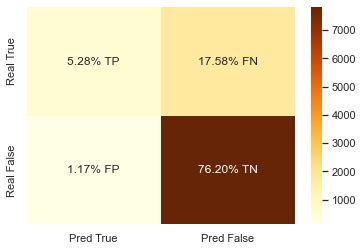

In [13]:
%%time
pred = forest_simple.predict(val_feat)
prob = forest_simple.predict_proba(val_feat)
score(val_targ, pred, prob[:,1])

In [14]:
pdf = score2('Simple','Basico',val_targ, pred, prob[:,1])
predictions = predictions.append( pdf )

### Validado

In [15]:
if( runValidated ):
    forest = RandomForestClassifier(
        random_state=1,
    )
    
    params = {
        'max_depth': np.arange(3, 20, 1),
        'min_samples_leaf': np.arange(100, 1000, 100),
        'criterion': ['gini', 'entropy'],
        'n_estimators': np.arange(100,500,100),
    }
    
    forest_grid = HalvingGridSearchCV(
        forest,
        params,
        scoring='roc_auc',
        n_jobs=MAX_JOBS,
        return_train_score=True,
        verbose=1
    ).fit(train_feat, train_targ)
    
    # Guardar
    if(saveValidated):
        dump(forest_grid, 'models/Ensambles/forest_grid.sk')
else:
    # Cargar
    forest_grid = load('models/Ensambles/forest_grid.sk')

In [16]:
print(f"Best score: {forest_grid.best_score_}")
print(f"Best params {forest_grid.best_params_}")

Best score: 0.8695507184487934
Best params {'criterion': 'gini', 'max_depth': 19, 'min_samples_leaf': 100, 'n_estimators': 400}


In [17]:
forest = forest_grid.best_estimator_

AUC-ROC: 0.866658130151448
              precision    recall  f1-score   support

       False       0.85      0.96      0.90      7946
        True       0.76      0.42      0.54      2290

    accuracy                           0.84     10236
   macro avg       0.80      0.69      0.72     10236
weighted avg       0.83      0.84      0.82     10236

CONFUSION MATRIX
CPU times: user 1.08 s, sys: 17.9 ms, total: 1.09 s
Wall time: 1.06 s


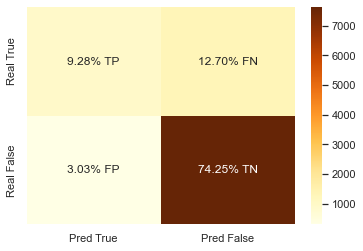

In [18]:
%%time
pred = forest.predict(val_feat)
prob = forest.predict_proba(val_feat)
score(val_targ, pred, prob[:,1])

In [19]:
pdf = score2('Val','Basico',val_targ, pred, prob[:,1])
predictions = predictions.append( pdf )

### Reg

In [20]:
if( runReg ):
    forest2 = RandomForestClassifier(
        random_state=1,
    )
    
    params = {
        'max_depth': np.arange(3, 20, 1),
        'min_samples_leaf': np.arange(100, 1000, 100),
        'criterion': ['gini', 'entropy'],
        'n_estimators': np.arange(100,500,100),
    }
    
    forest_grid2 = HalvingGridSearchCV(
        forest2,
        params,
        scoring='roc_auc',
        n_jobs=MAX_JOBS,
        return_train_score=True,
        verbose=1
    ).fit(train_feat_r, train_targ_r)
    
    # Guardar
    if(saveReg):
        dump(forest_grid2, 'models/Ensambles/forest_r_grid.sk')
else:
    # Cargar
    forest_grid2 = load('models/Ensambles/forest_r_grid.sk')

In [21]:
print(f"Best score: {forest_grid2.best_score_}")
print(f"Best params {forest_grid2.best_params_}")

Best score: 0.8695055607298585
Best params {'criterion': 'gini', 'max_depth': 15, 'min_samples_leaf': 100, 'n_estimators': 400}


In [22]:
forest_r = forest_grid2.best_estimator_

AUC-ROC: 0.8663972535136188
              precision    recall  f1-score   support

       False       0.85      0.96      0.90      7946
        True       0.74      0.43      0.55      2290

    accuracy                           0.84     10236
   macro avg       0.79      0.69      0.72     10236
weighted avg       0.83      0.84      0.82     10236

CONFUSION MATRIX
CPU times: user 1.03 s, sys: 16.1 ms, total: 1.05 s
Wall time: 1.02 s


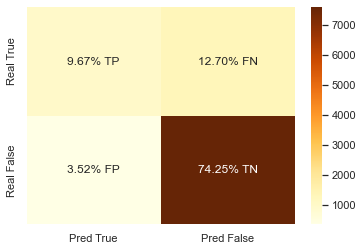

In [23]:
%%time
pred = forest_r.predict(val_feat_r)
prob = forest_r.predict_proba(val_feat_r)
score(val_targ_r, pred, prob[:,1])

In [24]:
pdf = score2('Reg','Regularizado',val_targ_r, pred, prob[:,1])
predictions = predictions.append( pdf )

### One Hot Encoded

In [25]:
if( runValidated ):
    forest_ohe = RandomForestClassifier(
        random_state=1,
    )
    
    params = {
        'max_depth': np.arange(3, 20, 1),
        'min_samples_leaf': np.arange(100, 1000, 100),
        'criterion': ['gini', 'entropy'],
        'n_estimators': np.arange(100,500,100),
    }
    
    forest_grid_ohe = HalvingGridSearchCV(
        forest_ohe,
        params,
        scoring='roc_auc',
        n_jobs=MAX_JOBS,
        return_train_score=True,
        verbose=1
    ).fit(train_feat2, train_targ2)
    
    # Guardar
    if(saveValidated):
        dump(forest_grid_ohe, 'models/Ensambles/forest_grid_ohe.sk')
else:
    # Cargar
    forest_grid_ohe = load('models/Ensambles/forest_grid_ohe.sk')

In [26]:
print(f"Best score: {forest_grid_ohe.best_score_}")
print(f"Best params {forest_grid_ohe.best_params_}")

Best score: 0.8627220878479067
Best params {'criterion': 'gini', 'max_depth': 19, 'min_samples_leaf': 100, 'n_estimators': 200}


In [27]:
forest_ohe = forest_grid_ohe.best_estimator_

AUC-ROC: 0.8589993921854615
              precision    recall  f1-score   support

       False       0.84      0.97      0.90      7946
        True       0.78      0.38      0.51      2290

    accuracy                           0.84     10236
   macro avg       0.81      0.67      0.70     10236
weighted avg       0.83      0.84      0.81     10236

CONFUSION MATRIX
CPU times: user 753 ms, sys: 20.5 ms, total: 773 ms
Wall time: 741 ms


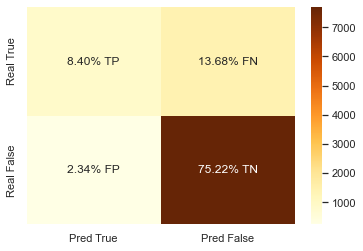

In [28]:
%%time
pred = forest_ohe.predict(val_feat2)
prob = forest_ohe.predict_proba(val_feat2)
score(val_targ2, pred, prob[:,1])

In [29]:
pdf = score2('Ohe','OHE',val_targ2, pred, prob[:,1])
predictions = predictions.append( pdf )

## Resultados

In [30]:
predictions

,Modelo,Preprocesamientos,Clase,AUC-ROC,Accuracy,Precision,Recall,F1 score,Support
0,Simple,Basico,AVG,0.825083,0.817018,0.816748,0.817018,0.775020,10236
1,Simple,Basico,True,NaN,NaN,0.815431,0.235371,0.365300,2290
2,Simple,Basico,False,NaN,NaN,0.817128,0.984646,0.893100,7946
0,Val,Basico,AVG,0.866658,0.839293,0.829684,0.839293,0.820944,10236
1,Val,Basico,True,NaN,NaN,0.755344,0.416594,0.537011,2290
2,Val,Basico,False,NaN,NaN,0.851109,0.961113,0.902772,7946
0,Reg,Regularizado,AVG,0.866397,0.838511,0.827651,0.838511,0.822192,10236
1,Reg,Regularizado,True,NaN,NaN,0.735751,0.434061,0.546004,2290
2,Reg,Regularizado,False,NaN,NaN,0.854136,0.955072,0.901788,7946
0,Ohe,OHE,AVG,0.858999,0.836460,0.828995,0.836460,0.813564,10236


In [31]:
if(saveBest):
    dump(forest_grid.best_estimator_, 'models/Ensambles/random_forest.sk')